# Project 1: Defining a Problem and Data Understanding

## Introducing the Problem:
Using patient health information to predict heart attack risk.

## Introducing the Data:
Dataset: https://www.kaggle.com/datasets/waqi786/heart-attack-dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

HA_df = pd.read_csv('heart_attack_dataset.csv')

In [16]:
HA_df.shape

(1000, 8)

In [17]:
HA_df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


## Preprocessing
The row in this dataset called "Treatment" is not important to my problem and my project so I will be dropping that column and focusing only on the first seven columns.

In [18]:
HA_df = HA_df.drop(['Treatment'], axis=1)


In [19]:
HA_df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type
0,Male,70,181,262,No,Never,Typical Angina
1,Female,55,103,253,Yes,Never,Atypical Angina
2,Male,42,95,295,Yes,Current,Typical Angina
3,Male,84,106,270,No,Never,Atypical Angina
4,Male,86,187,296,Yes,Current,Non-anginal Pain


In [20]:
HA_df.isna().sum()

Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
dtype: int64

## Visualizations and Explainations

In [34]:
male_data = HA_df[HA_df['Gender'] == 'Male']
female_data = HA_df[HA_df['Gender'] == 'Female']

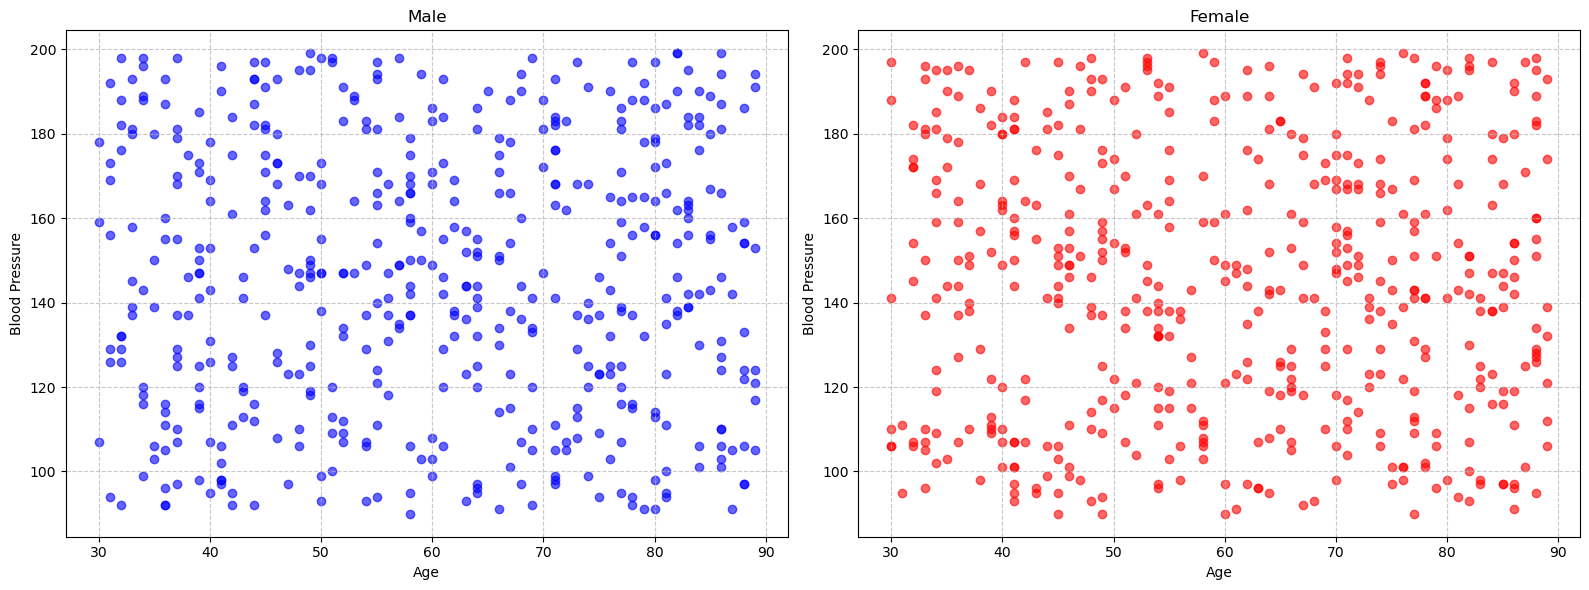

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Plot male data
ax1.scatter(male_data['Age'], male_data['Blood Pressure (mmHg)'], 
            color='blue', alpha=0.6)
ax1.set_title('Male Age vs Blood Pressure')
ax1.set_xlabel('Age')
ax1.set_ylabel('Blood Pressure')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot female data
ax2.scatter(female_data['Age'], female_data['Blood Pressure (mmHg)'], 
            color='red', alpha=0.6)
ax2.set_title('Female Age vs Blood Pressure')
ax2.set_xlabel('Age')
ax2.set_ylabel('Blood Pressure')
ax2.grid(True, linestyle='--', alpha=0.7)

# Ensure the y-axis limits are the same for both plots
y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Adjust layout and display
plt.tight_layout()
plt.show()

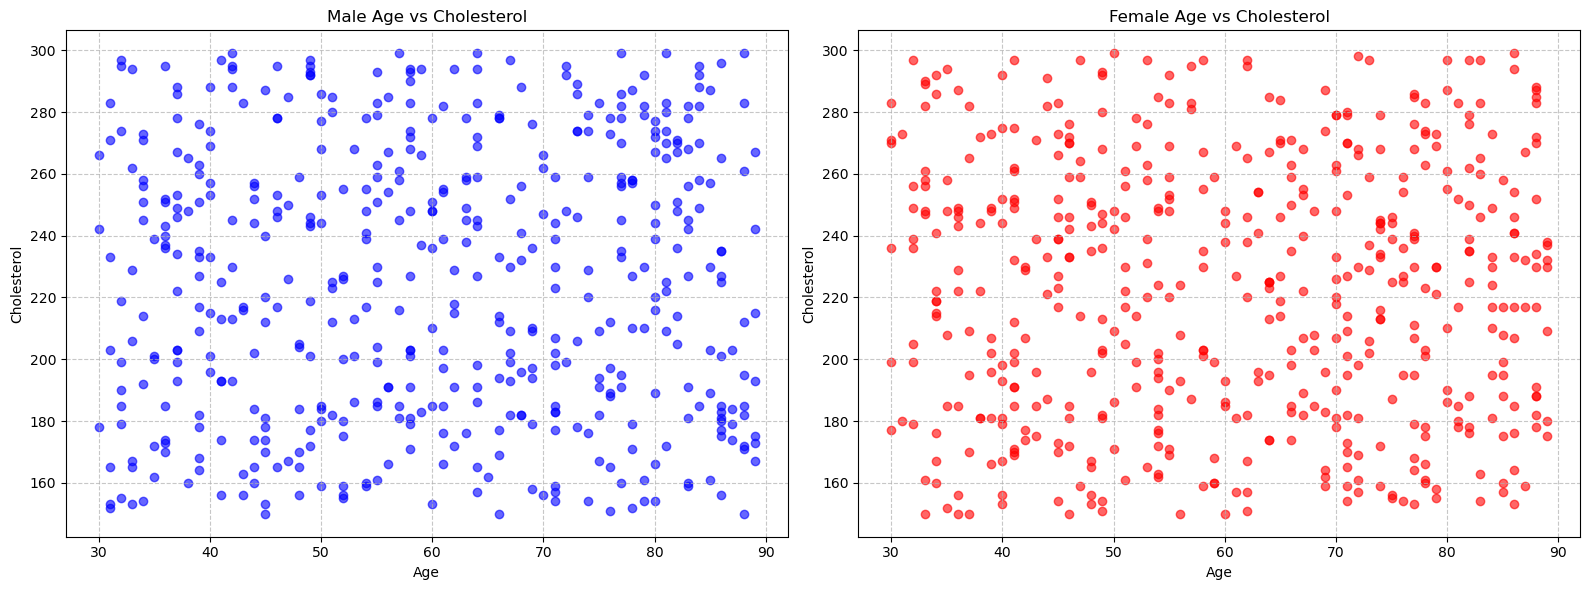

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Plot male data
ax1.scatter(male_data['Age'], male_data['Cholesterol (mg/dL)'], 
            color='blue', alpha=0.6)
ax1.set_title('Male Age vs Cholesterol')
ax1.set_xlabel('Age')
ax1.set_ylabel('Cholesterol')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot female data
ax2.scatter(female_data['Age'], female_data['Cholesterol (mg/dL)'], 
            color='red', alpha=0.6)
ax2.set_title('Female Age vs Cholesterol')
ax2.set_xlabel('Age')
ax2.set_ylabel('Cholesterol')
ax2.grid(True, linestyle='--', alpha=0.7)

# Ensure the y-axis limits are the same for both plots
y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [55]:
def age_category(age):
    if age < 30:
        return '18-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60+'

# Add age category to the DataFrame
HA_df['age_category'] = HA_df['Age'].apply(age_category)

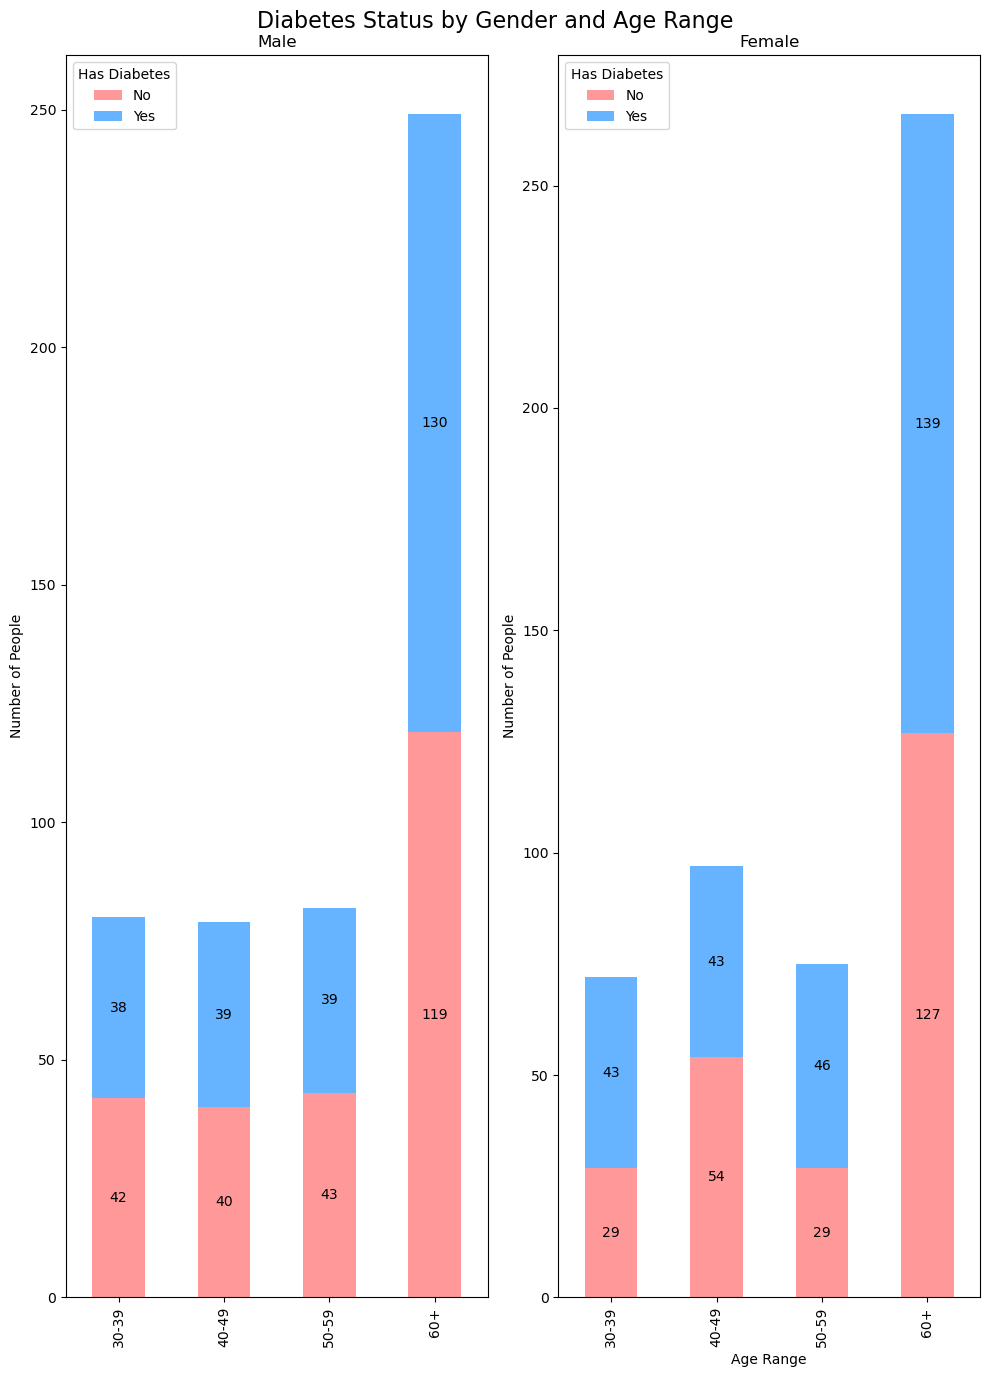

In [58]:
# Group the data
grouped = HA_df.groupby(['Gender', 'age_category', 'Has Diabetes']).size().unstack(fill_value=0)

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 14))
fig.suptitle('Diabetes Status by Gender and Age Range', fontsize=16)

# Colors for has and doesn't have diabetes
colors = ['#ff9999', '#66b3ff']

# Plot for Males
grouped.loc['Male'].plot(kind='bar', stacked=True, ax=ax1, color=colors)
ax1.set_title('Male')
ax1.set_xlabel('')
ax1.set_ylabel('Number of People')
ax.legend(['Non-diabetic', 'diabetic'])

# Plot for Females
grouped.loc['Female'].plot(kind='bar', stacked=True, ax=ax2, color=colors)
ax2.set_title('Female')
ax2.set_xlabel('Age Range')
ax2.set_ylabel('Number of People')
ax.legend(['Non-diabetic', 'diabetic'])

# Add value labels
for ax in [ax1, ax2]:
    for c in ax.containers:
        ax.bar_label(c, label_type='center')

# Adjust layout and display
plt.tight_layout()
plt.show()

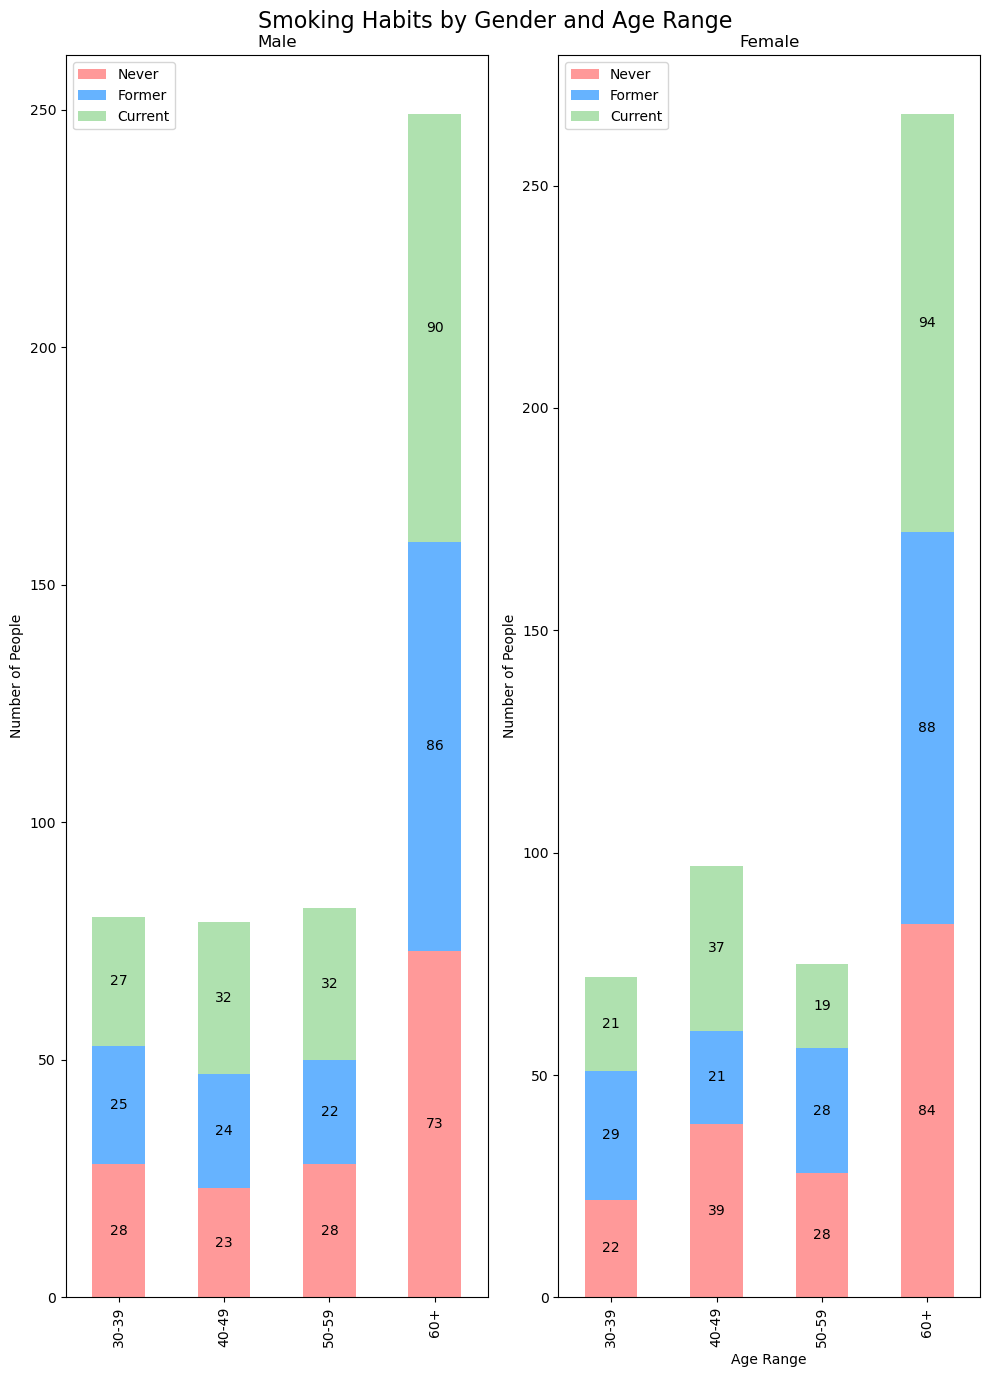

In [60]:
# Group the data
grouped = HA_df.groupby(['Gender', 'age_category', 'Smoking Status']).size().unstack(fill_value=0)

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 14))
fig.suptitle('Smoking Habits by Gender and Age Range', fontsize=16)

# Colors for smokers and non-smokers
colors = ['#ff9999', '#66b3ff', '#AFE1AF']

# Plot for Males
grouped.loc['Male'].plot(kind='bar', stacked=True, ax=ax1, color=colors)
ax1.set_title('Male')
ax1.set_xlabel('')
ax1.set_ylabel('Number of People')
ax1.legend(['Never', 'Former', 'Current'])

# Plot for Females
grouped.loc['Female'].plot(kind='bar', stacked=True, ax=ax2, color=colors)
ax2.set_title('Female')
ax2.set_xlabel('Age Range')
ax2.set_ylabel('Number of People')
ax2.legend(['Never', 'Former', 'Current'])

# Add value labels
for ax in [ax1, ax2]:
    for c in ax.containers:
        ax.bar_label(c, label_type='center')

# Adjust layout and display
plt.tight_layout()
plt.show()